 # NYC Trip Fare

In [2]:
pip install skimpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from datetime import timedelta
from skimpy import skim

In [4]:
# To avoid the dtype error for store_and_fwd_flag column we set the type of the variable to category
NYC = pd.read_csv("C:/Users/edoar/Downloads/NYC/NYC.csv", 
                  dtype = {'store_and_fwd_flag': 'category'})
NYC.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
#Format='mixed' attempts to automatically infer the date format for each element individually within the column. 
# It was not risky to use this command because the date formats were not ambiguous. 
NYC['tpep_pickup_datetime'] = pd.to_datetime(NYC['tpep_pickup_datetime'], format ='mixed')
NYC['tpep_dropoff_datetime'] = pd.to_datetime(NYC['tpep_dropoff_datetime'], format ='mixed')

In [6]:
skim(NYC)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types               Categories                                       │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                               │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                               │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                               │
│ │ Number of rows    │ 6405008 │ │ float64     │ 13    │ │ store_and_fwd_flag    │                               │
│ │ Number of columns │ 18      │ │ datetime64  │ 2     │ └───────────────────────┘                               │
│ └───────────────────┴─────────┘ │ int32       │ 2     │                                                         │
│                                 │ category    │ 1     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA     ┃ NA %  ┃ mean   ┃ sd      ┃ p0     ┃ p25   ┃ p50  ┃ p75  ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ VendorID              │  65441 │  1.02 │   1.67 │  0.4703 │      1 │     1 │    2 │    2 │      2 │ ▃    ▇ │  │
│ │ passenger_count       │  65441 │  1.02 │  1.515 │   1.152 │      0 │     1 │    1 │    2 │      9 │  ▇▂▁   │  │
│ │ trip_distance         │      0 │     0 │   2.93 │   83.16 │ -30.62 │  0.96 │  1.6 │ 2.93 │ 210200 │   ▇    │  │
│ │ RatecodeID            │  65441 │  1.02 │   1.06 │  0.8118 │      1 │     1 │    1 │    1 │     99 │   ▇    │  │
│ │ PULocationID          │      0 │     0 │  164.7 │   65.54 │      1 │   132 │  162 │  234 │    265 │ ▁▃▃▇▁▇ │  │
│ │ DOLocationID          │      0 │     0 │  162.7 │   69.91 │      1 │   113 │  162 │  234 │    265 │ ▁▃▂▇▁▇ │  │
│ │ payment_type          │  65441 │  1.02 │   1.27 │   0.474 │      1 │     1 │    1 │    2 │      5 │   ▇▃   │  │
│ │ fare_amount           │      0 │     0 │  12.69 │   12.13 │  -1238 │   6.5 │    9 │   14 │   4265 │    ▇   │  │
│ │ extra                 │      0 │     0 │  1.115 │    1.26 │    -27 │     0 │  0.5 │  2.5 │    113 │    ▇   │  │
│ │ mta_tax               │      0 │     0 │ 0.4923 │ 0.07374 │   -0.5 │   0.5 │  0.5 │  0.5 │   30.8 │   ▇    │  │
│ │ tip_amount            │      0 │     0 │  2.189 │    2.76 │    -91 │     0 │ 1.95 │ 2.86 │   1100 │   ▇    │  │
│ │ tolls_amount          │      0 │     0 │ 0.3488 │   1.767 │ -35.74 │     0 │    0 │    0 │  910.5 │   ▇    │  │
│ │ improvement_surcharge │      0 │     0 │  0.298 │ 0.03386 │   -0.3 │   0.3 │  0.3 │  0.3 │    0.3 │      ▇ │  │
│ │ total_amount          │      0 │     0 │  18.66 │   14.76 │  -1242 │ 11.16 │ 14.3 │ 19.8 │   4268 │    ▇   │  │
│ │ congestion_surcharge  │      0 │     0 │  2.276 │  0.7353 │   -2.5 │   2.5 │  2.5 │  2.5 │   2.75 │   ▁  ▇ │  │
│ └───────────────────────┴────────┴───────┴────────┴─────────┴────────┴───────┴──────┴──────┴────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                              ┃ NA            ┃ NA %        ┃ ordered          ┃ unique         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ store_and_fwd_flag                       │         6

In [7]:
# We remove the rows with negative distances
neg_dist=NYC[NYC['trip_distance']<0]
NYC=NYC.drop(neg_dist.index)
NYC.reset_index()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402665,6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6402666,6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6402667,6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6402668,6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [8]:
# We noticed that in some rows all the attributes relative to payments were negative so 
# at first we saved the indexes of those rows
negative_rows = NYC[NYC['fare_amount'] < 0]
modified_indices = negative_rows.index.tolist()

# Then all the negative values are transformed into positive 
NYC.loc[modified_indices] = NYC.loc[modified_indices].map(
    lambda x: abs(x) if isinstance(x, (int, float)) else x
)

# Here we searched for duplicates (ie couple of rows that could refer to cancelled trips)
duplicated_rows = NYC[NYC.duplicated(keep=False)]
NYC = NYC.drop(duplicated_rows.index)

# In the end we remove the remaining negative rows
remaining_indices = set(modified_indices) - set(duplicated_rows.index)
NYC = NYC.drop(remaining_indices) 
NYC

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


## 1.Extract all trips with trip_distance larger than 50

In [10]:
larger_trip = NYC[NYC['trip_distance'] > 50]
larger_trip

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
23842,2.0,2020-01-01 01:53:07,2020-01-01 03:54:41,1.0,52.30,5.0,N,262,265,1.0,300.00,0.00,0.0,61.78,6.12,0.3,370.70,2.5
39013,2.0,2020-01-01 02:05:07,2020-01-01 03:03:10,1.0,51.23,5.0,N,264,264,1.0,329.00,0.00,0.5,100.78,6.12,0.3,436.70,0.0
41620,1.0,2020-01-01 03:05:54,2020-01-01 04:16:26,1.0,53.80,5.0,N,132,265,1.0,250.00,0.00,0.0,53.35,16.62,0.3,320.27,0.0
58262,2.0,2020-01-01 05:36:12,2020-01-01 06:40:06,1.0,55.23,5.0,N,132,265,2.0,170.00,0.00,0.5,0.00,18.26,0.3,189.06,0.0
63024,2.0,2020-01-01 07:40:30,2020-01-01 08:40:01,1.0,54.19,5.0,N,132,265,1.0,230.00,0.00,0.0,0.00,12.24,0.3,242.54,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326169,2.0,2020-01-31 22:47:26,2020-01-31 23:49:14,1.0,51.83,5.0,N,132,265,1.0,220.00,0.00,0.5,48.96,23.99,0.3,293.75,0.0
6331181,2.0,2020-01-31 23:45:36,2020-02-01 01:00:25,5.0,57.99,4.0,N,107,265,1.0,245.00,0.50,0.5,38.24,6.12,0.3,293.16,2.5
6333801,2.0,2020-01-31 23:24:16,2020-02-01 01:32:56,1.0,52.97,4.0,N,264,265,1.0,227.00,0.50,0.5,46.16,0.00,0.3,276.96,2.5
6397132,NaN,2020-01-28 11:54:00,2020-01-28 19:35:00,NaN,60.36,NaN,NaN,17,61,NaN,12.04,0.00,0.5,0.00,12.24,0.3,25.08,0.0


## 2.Extract all trips where payment_type is missing

In [12]:
# For each row we check if the payment type is missing
no_payment = NYC[NYC['payment_type'].isna()]
no_payment

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6339567,NaN,2020-01-01 08:51:00,2020-01-01 09:19:00,NaN,13.69,NaN,NaN,136,232,NaN,51.05,2.75,0.5,0.0,0.00,0.3,54.60,0.0
6339568,NaN,2020-01-01 08:38:43,2020-01-01 08:51:08,NaN,3.42,NaN,NaN,121,9,NaN,27.06,2.75,0.0,0.0,0.00,0.3,30.11,0.0
6339569,NaN,2020-01-01 08:27:00,2020-01-01 08:32:00,NaN,2.20,NaN,NaN,197,216,NaN,24.36,2.75,0.5,0.0,0.00,0.3,27.91,0.0
6339570,NaN,2020-01-01 08:46:00,2020-01-01 08:57:00,NaN,0.84,NaN,NaN,262,236,NaN,26.08,2.75,0.5,0.0,0.00,0.3,29.63,0.0
6339571,NaN,2020-01-01 08:21:00,2020-01-01 08:38:00,NaN,7.24,NaN,NaN,45,142,NaN,25.28,2.75,0.5,0.0,0.00,0.3,28.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0


## 3.For each (PULocationID, DOLocationID) pair, determine the number of trips

In [14]:
# We used groupby to make the PU,DO location pairs and then used size to determine the number of trips related 
n_trips = NYC.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='n_trips')
n_trips=n_trips.sort_values(['PULocationID', 'DOLocationID'])
n_trips

,PULocationID,DOLocationID,n_trips
0,1,1,629
1,1,50,1
2,1,68,1
3,1,138,2
4,1,140,1
...,...,...,...
30356,265,259,1
30357,265,261,1
30358,265,263,4
30359,265,264,313


## 4.Save all rows with missing VendorID, passenger_count, store_and_fwd_flag, payment_type in a new dataframe called bad, and remove those rows from the original dataframe.

In [16]:
# All rows having at least one missing values in one of these columns 
#(VendorID, passenger_count, store_and_fwd_flag, payment_type) are selected
bad = NYC[NYC[['VendorID', 'passenger_count', 'store_and_fwd_flag', 'payment_type']].isna().any(axis=1)]
bad

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
6339567,NaN,2020-01-01 08:51:00,2020-01-01 09:19:00,NaN,13.69,NaN,NaN,136,232,NaN,51.05,2.75,0.5,0.0,0.00,0.3,54.60,0.0
6339568,NaN,2020-01-01 08:38:43,2020-01-01 08:51:08,NaN,3.42,NaN,NaN,121,9,NaN,27.06,2.75,0.0,0.0,0.00,0.3,30.11,0.0
6339569,NaN,2020-01-01 08:27:00,2020-01-01 08:32:00,NaN,2.20,NaN,NaN,197,216,NaN,24.36,2.75,0.5,0.0,0.00,0.3,27.91,0.0
6339570,NaN,2020-01-01 08:46:00,2020-01-01 08:57:00,NaN,0.84,NaN,NaN,262,236,NaN,26.08,2.75,0.5,0.0,0.00,0.3,29.63,0.0
6339571,NaN,2020-01-01 08:21:00,2020-01-01 08:38:00,NaN,7.24,NaN,NaN,45,142,NaN,25.28,2.75,0.5,0.0,0.00,0.3,28.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.0,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.0,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.0,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.0,0.00,0.3,30.22,0.0


In [17]:
# We removed the "bad" rows from the original dataset to create a new one with no NaN
NYC_nona = NYC.drop(bad.index)
NYC_nona.reset_index()
NYC_nona

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5


## 5.Add a duration column storing how long each trip has taken (use tpep_pickup_datetime, tpep_dropoff_datetime)

In [19]:
# We subtracted the pick-up time from the drop-off time to calculate the duration of each trip
NYC_nona['duration'] = (NYC_nona['tpep_dropoff_datetime'] - NYC_nona['tpep_pickup_datetime'])
NYC_nona

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5,0 days 00:14:14
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,0 days 00:19:00
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5,0 days 00:16:17
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5,0 days 00:09:38


In [20]:
# Checking if there are some rows where DO_datetime is before PU_datetime 
err_duration = NYC_nona[NYC_nona['duration'] <timedelta(0)]
# Removing inconsistencies 
NYC_nona=NYC_nona.drop(err_duration.index)
NYC_nona.reset_index()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6317062,6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5,0 days 00:14:14
6317063,6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5,0 days 00:19:00
6317064,6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5,0 days 00:16:17
6317065,6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5,0 days 00:09:38


## 6.For each pickup location, determine how many trips have started there.

In [23]:
# We grouped by PU location and then used size to determine the number of trips started there 
n_started = NYC_nona.groupby('PULocationID').size().rename('n_started').to_frame()
n_started

,n_started
PULocationID,
1,746
2,3
3,70
4,9850
5,39
...,...
261,34088
262,85375
263,123594


## 7.Cluster the pickup time of the day into 30-minute intervals (e.g. from 02:00 to 02:30)

In [26]:
# We rounded every pickup time to the previous half-hour
NYC_nona['clustered_pu_time'] = pd.to_datetime(NYC_nona['tpep_pickup_datetime']).dt.floor('30min').dt.time
NYC_nona[['tpep_pickup_datetime','clustered_pu_time']].sort_values('clustered_pu_time')

,tpep_pickup_datetime,clustered_pu_time
0,2020-01-01 00:28:15,00:00:00
2930202,2020-01-16 00:06:17,00:00:00
2930203,2020-01-16 00:01:00,00:00:00
2930204,2020-01-16 00:07:54,00:00:00
2930206,2020-01-16 00:28:29,00:00:00
...,...,...
1668288,2020-01-09 23:52:32,23:30:00
1668330,2020-01-09 23:53:55,23:30:00
1668363,2020-01-09 23:58:23,23:30:00
1667760,2020-01-09 23:51:05,23:30:00


## 8.For each interval, determine the average number of passengers and the average fare amount.

In [28]:
# We grouped by PU time interval and then used mean to compute the average of number of passengers and fare amount
intervals = NYC_nona.groupby('clustered_pu_time')[['passenger_count', 'fare_amount']].mean().rename(
    columns={'passenger_count': 'average passenger count', 'fare_amount': 'average fare amount'})
intervals

,average passenger count,average fare amount
clustered_pu_time,,
00:00:00,1.573773,13.636197
00:30:00,1.585621,13.333230
01:00:00,1.580176,12.827484
01:30:00,1.590201,12.393858
02:00:00,1.588002,12.220783
02:30:00,1.588507,12.203625
03:00:00,1.584083,12.697753
03:30:00,1.587730,13.296441
04:00:00,1.581479,14.427337


## 9.For each payment type and each interval, determine the average fare amount

In [30]:
# We grouped by payment type and PU time interval and then used mean to compute the average of the fare amount
payments_intervals = NYC_nona.groupby(['payment_type','clustered_pu_time'])['fare_amount'].mean().reset_index().rename(
    columns={'fare_amount': 'average fare amount'})
payments_intervals

,payment_type,clustered_pu_time,average fare amount
0,1.0,00:00:00,13.869142
1,1.0,00:30:00,13.472705
2,1.0,01:00:00,12.824603
3,1.0,01:30:00,12.357974
4,1.0,02:00:00,12.008589
...,...,...,...
188,4.0,22:00:00,13.521681
189,4.0,22:30:00,15.444021
190,4.0,23:00:00,13.995263
191,4.0,23:30:00,14.499497


## 10.For each payment type, determine the interval when the average fare amount is maximum

In [32]:
# Using the table computed in the previous point, we extracted the maximum average fare amount with idxmax 
# for each payment type (group by) and then located it with .loc
max_avg_fare = payments_intervals.loc[payments_intervals.groupby('payment_type')['average fare amount'].idxmax()]
max_avg_fare

,payment_type,clustered_pu_time,average fare amount
10,1.0,05:00:00,21.256949
58,2.0,05:00:00,14.944475
105,3.0,04:30:00,16.555657
154,4.0,05:00:00,24.230667
192,5.0,17:30:00,0.000000


## 11.For each payment type, determine the interval when the overall ratio between the tip and the fare amounts is maximum

In [34]:
# We used groupby to make the payment type, PU time interval pairs and then computed the sum of tip and fare amount
overall_ratio = NYC_nona.groupby(['payment_type', 'clustered_pu_time']).agg(
    total_tip_amount=('tip_amount', 'sum'),
    total_fare_amount=('fare_amount', 'sum')).reset_index()

# We computed the overall ratio
overall_ratio['overall_ratio'] = overall_ratio['total_tip_amount'] / overall_ratio['total_fare_amount']

# From the previous point, we noticed that for the payment type 5 all the payments were 0 so the ratio result is null
# To allow .idxmax() to work, we removed this result
overall_ratio = overall_ratio[overall_ratio['overall_ratio'].notnull()]

# We extracted the maximum overall ratio with idxmax 
# for each payment type (group by) and then located it with .loc
max_overall_ratio = overall_ratio.loc[overall_ratio.groupby('payment_type')['overall_ratio'].idxmax()]

max_overall_ratio

,payment_type,clustered_pu_time,total_tip_amount,total_fare_amount,overall_ratio
37,1.0,18:30:00,485539.83,1998339.28,0.242972
68,2.0,10:00:00,22.88,453651.77,0.000050
138,3.0,21:00:00,41.65,7623.82,0.005463
164,4.0,10:00:00,3.95,2088.02,0.001892


## 12.Find the location with the highest average fare amount

In [36]:
# For each PU location we compute the average fare amount
max_loc = NYC_nona.groupby('PULocationID')['fare_amount'].mean()

# We extract the index of the PU location with the maximum average fare amount
max_pulocation_id = max_loc.idxmax() 

# We extract the maximum average fare amount for that location
max_fare_amount = max_loc.max() 
print(f"PULocationID: {max_pulocation_id}, Highest Mean Fare Amount: {max_fare_amount}")

PULocationID: 204, Highest Mean Fare Amount: 107.0


## 13.Build a new dataframe (called common) where, for each pickup location we keep all trips to the 5 most common destinations (i.e. each pickup location can have different common destinations).

In [38]:
# We grouped by pickup and drop-off locations and counted occurrences
sum_dest = NYC_nona.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='count')

# For each PU location we computed the 5 most frequent DO locations
top5dest = (sum_dest.sort_values(by=['PULocationID', 'count'], ascending=[True, False])
            .groupby('PULocationID').head(5).reset_index(drop=True))
top5dest

,PULocationID,DOLocationID,count
0,1,1,629
1,1,264,105
2,1,265,4
3,1,138,2
4,1,50,1
...,...,...,...
1255,265,265,2451
1256,265,264,313
1257,265,1,76
1258,265,48,18


In [39]:
# We created a new dataframe containing only the trips having PU,DO location pair in the top5dest table
common = NYC_nona.merge(top5dest[['PULocationID', 'DOLocationID']], on=['PULocationID', 'DOLocationID'], how='inner')
common

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,clustered_pu_time
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48,00:00:00
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25,00:30:00
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11,00:30:00
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51,00:30:00
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945362,2.0,2020-02-01 00:00:37,2020-02-01 00:11:59,1.0,1.18,1.0,N,186,170,1.0,8.5,0.5,0.5,2.46,0.0,0.3,14.76,2.5,0 days 00:11:22,00:00:00
1945363,2.0,2020-01-31 22:59:01,2020-01-31 23:06:15,3.0,0.90,1.0,N,238,239,2.0,6.5,0.5,0.5,0.00,0.0,0.3,10.30,2.5,0 days 00:07:14,22:30:00
1945364,2.0,2020-01-31 23:44:34,2020-01-31 23:47:46,3.0,0.80,1.0,N,141,141,2.0,4.5,0.5,0.5,0.00,0.0,0.3,8.30,2.5,0 days 00:03:12,23:30:00
1945365,2.0,2020-01-31 23:01:38,2020-01-31 23:05:49,1.0,0.74,1.0,N,48,142,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,0 days 00:04:11,23:00:00


## 14.On the common dataframe, for each payment type and each interval, determine the average fare amount

In [41]:
# We grouped by payment type and PU time interval and then used mean to compute the average of the fare amount
common_pay_int = common.groupby(['payment_type','clustered_pu_time'])['fare_amount'].mean().reset_index().rename(
    columns={'fare_amount': 'average fare amount 2'})
common_pay_int

,payment_type,clustered_pu_time,average fare amount 2
0,1.0,00:00:00,8.543145
1,1.0,00:30:00,8.635086
2,1.0,01:00:00,8.475573
3,1.0,01:30:00,7.963448
4,1.0,02:00:00,7.923179
...,...,...,...
188,4.0,22:00:00,9.250238
189,4.0,22:30:00,11.558966
190,4.0,23:00:00,7.146154
191,4.0,23:30:00,8.628148


## 15.Compute the difference of the average fare amount computed in the previous point with those computed at point 9.

In [43]:
diff = pd.merge(common_pay_int, payments_intervals, on=['clustered_pu_time', 'payment_type'])
diff['difference'] = diff['average fare amount 2'] - diff['average fare amount']
diff[['payment_type','clustered_pu_time','difference']]

,payment_type,clustered_pu_time,difference
0,1.0,00:00:00,-5.325997
1,1.0,00:30:00,-4.837619
2,1.0,01:00:00,-4.349030
3,1.0,01:30:00,-4.394526
4,1.0,02:00:00,-4.085410
...,...,...,...
188,4.0,22:00:00,-4.271443
189,4.0,22:30:00,-3.885056
190,4.0,23:00:00,-6.849109
191,4.0,23:30:00,-5.871349


## 16.Compute the ratio between the differences computed in the previous point and those computed in point 9. Note: you have to compute a ratio for each pair (payment type, interval).

In [45]:
diff['ratio'] = diff['difference']/diff['average fare amount']
diff[['payment_type','clustered_pu_time','ratio']]

,payment_type,clustered_pu_time,ratio
0,1.0,00:00:00,-0.384018
1,1.0,00:30:00,-0.359068
2,1.0,01:00:00,-0.339116
3,1.0,01:30:00,-0.355602
4,1.0,02:00:00,-0.340207
...,...,...,...
188,4.0,22:00:00,-0.315896
189,4.0,22:30:00,-0.251557
190,4.0,23:00:00,-0.489388
191,4.0,23:30:00,-0.404935


## 17.Build chains of trips. Two trips are consecutive in a chain if (a) they have the same VendorID, (b) the pickup location of the second trip is also the dropoff location of the first trip, (c) the pickup time of the second trip is after the dropoff time of the first trip, and (d) the pickup time of the second trip is at most 2 minutes later than the dropoff time of the first trip.


In [47]:
# We decided to remove the columns that will not be needed to improve clarity
NYC_small = NYC_nona.drop(['passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'duration','clustered_pu_time'], axis=1)
NYC_small 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,238,239
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,239,238
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,238,238
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,238,151
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,193,193
...,...,...,...,...,...
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,163,246
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,164,79
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,79,68
6339565,2.0,2020-01-31 23:44:22,2020-01-31 23:54:00,100,142


In [48]:
# First we create two copies of the dataset that will be needed for creating the PULocation-DOLocation pairs
df1 = NYC_small.copy()
df2 = NYC_small.copy()

In [49]:
# We need to create a common column to use as key for the merge, for df1 we select the DOLocation, while for
# df2 we select PULocation
df1['LocationID'] = df1['DOLocationID']
df2['LocationID'] = df2['PULocationID']

In [50]:
# We save the indexes of the df1 and df2 in two new columns, since merging these two datasets will end up
# losing the original indexes
df1 = df1.reset_index(drop=False).rename(columns={'index': 'trip_id_left'})
df2 = df2.reset_index(drop=False).rename(columns={'index': 'trip_id_right'})

In [51]:
# Here we sort the two dataframes according to the variables we will compute the merge on (left_on and right_on)
df1 = df1.sort_values(by=['tpep_dropoff_datetime', 'VendorID',  'LocationID', 'tpep_pickup_datetime']).reset_index(drop=True)
df2 = df2.sort_values(by=['tpep_pickup_datetime', 'VendorID',  'LocationID', 'tpep_dropoff_datetime']).reset_index(drop=True)

In [52]:
df1.head()

,trip_id_left,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,LocationID
0,782435,2.0,2003-01-01 00:07:17,2003-01-01 14:16:59,193,193,193
1,3136556,2.0,2008-12-31 23:17:15,2008-12-31 23:32:32,162,263,263
2,3136557,2.0,2008-12-31 23:35:00,2008-12-31 23:36:53,263,263,263
3,3392619,2.0,2008-12-31 23:06:13,2008-12-31 23:37:14,144,230,230
4,3136558,2.0,2008-12-31 23:39:37,2008-12-31 23:55:35,263,143,143


In [53]:
# This type of merge allows us to set a tolerance threshold. In this case, we join df1 and df2 so that 
# for each row in df1, the trips that connect to it are added. 
# The conditions for two trips to be connected are:

# 1) The drop-off time in df1 (on the left) must be "equal" to the pickup time in df2 (on the right). The quotation marks around "equal" 
# are used because it's possible to set a tolerance threshold, which we set to 2 minutes. Setting direction = 'forward' 
# removes the possibility of connecting trips with a time difference < 0, as it orders them.

# 2) With by=['VendorID', 'LocationID'], we ensure that the VendorID must also match, and that they have the same 
# LocationID (this works because df1 considers the drop-off location (DOL), while df2 considers the pickup location (PUL), 
# and here we're essentially adding df2 to df1).

# The allow_exact_matches was set to False since some of the trips that apparently last 0 seconds, and start and end in the same
# location would pair up with themselves

# The suffixes part is for later, as the merge will produce columns with the same name, but with the addition of 
# _left for those from df1 and _right for those from df2.

df_merged = pd.merge_asof(
    df1,
    df2,
    left_on='tpep_dropoff_datetime',
    right_on='tpep_pickup_datetime',
    by=['VendorID', 'LocationID'],
    tolerance=pd.Timedelta('2min'),
    allow_exact_matches=False,
    direction='forward',
    suffixes=('_left', '_right')
)


In [54]:
df_merged

,trip_id_left,VendorID,tpep_pickup_datetime_left,tpep_dropoff_datetime_left,PULocationID_left,DOLocationID_left,LocationID,trip_id_right,tpep_pickup_datetime_right,tpep_dropoff_datetime_right,PULocationID_right,DOLocationID_right
0,782435,2.0,2003-01-01 00:07:17,2003-01-01 14:16:59,193,193,193,NaN,NaT,NaT,NaN,NaN
1,3136556,2.0,2008-12-31 23:17:15,2008-12-31 23:32:32,162,263,263,NaN,NaT,NaT,NaN,NaN
2,3136557,2.0,2008-12-31 23:35:00,2008-12-31 23:36:53,263,263,263,NaN,NaT,NaT,NaN,NaN
3,3392619,2.0,2008-12-31 23:06:13,2008-12-31 23:37:14,144,230,230,NaN,NaT,NaT,NaN,NaN
4,3136558,2.0,2008-12-31 23:39:37,2008-12-31 23:55:35,263,143,143,NaN,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6317062,4269480,2.0,2020-07-10 11:34:11,2020-07-10 11:42:41,236,262,262,NaN,NaT,NaT,NaN,NaN
6317063,4282277,2.0,2020-07-31 18:50:41,2020-07-31 18:54:12,236,43,43,NaN,NaT,NaT,NaN,NaN
6317064,275044,2.0,2021-01-02 00:22:00,2021-01-02 00:36:50,142,161,161,NaN,NaT,NaT,NaN,NaN
6317065,275045,2.0,2021-01-02 00:44:08,2021-01-02 00:58:56,170,148,148,NaN,NaT,NaT,NaN,NaN


In [55]:
# If a row has NaN it means that such trip was not connected to any other trips, and thus we removed them
df_edges = df_merged.dropna()
df_edges

,trip_id_left,VendorID,tpep_pickup_datetime_left,tpep_dropoff_datetime_left,PULocationID_left,DOLocationID_left,LocationID,trip_id_right,tpep_pickup_datetime_right,tpep_dropoff_datetime_right,PULocationID_right,DOLocationID_right
10,91358,2.0,2009-01-01 00:17:41,2009-01-01 00:51:18,164,132,132,99910.0,2009-01-01 00:52:20,2009-01-01 00:59:07,132.0,132.0
30,7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,193,193,193,8.0,2019-12-18 15:30:35,2019-12-18 15:31:35,193.0,193.0
33,15420,2.0,2019-12-31 13:44:49,2019-12-31 13:59:39,161,74,74,30243.0,2019-12-31 14:01:22,2019-12-31 14:16:22,74.0,167.0
37,15358,2.0,2019-12-31 15:30:40,2019-12-31 15:33:04,24,238,238,15359.0,2019-12-31 15:34:11,2019-12-31 15:46:24,238.0,229.0
46,30185,2.0,2019-12-31 16:01:57,2019-12-31 16:10:58,170,90,90,30186.0,2019-12-31 16:12:01,2020-01-01 15:29:55,90.0,238.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6315513,6329294,2.0,2020-01-31 23:44:47,2020-02-01 00:07:09,224,148,148,6339239.0,2020-02-01 00:08:34,2020-02-01 00:26:14,148.0,246.0
6315521,6337769,2.0,2020-01-31 23:49:51,2020-02-01 00:07:11,113,148,148,6339239.0,2020-02-01 00:08:34,2020-02-01 00:26:14,148.0,246.0
6315674,6338331,2.0,2020-01-31 23:44:55,2020-02-01 00:08:25,48,148,148,6339239.0,2020-02-01 00:08:34,2020-02-01 00:26:14,148.0,246.0
6317043,4189277,2.0,2020-02-12 02:10:17,2020-02-12 02:31:48,162,163,163,4189278.0,2020-02-12 02:33:13,2020-02-12 02:40:33,163.0,143.0


### Problem

In [57]:
# There are multiple trips that can be connected as predecessors to the same consequent trip.
print(df_edges['trip_id_left'].nunique())
print(df_edges['trip_id_right'].nunique())

5165973
2750428


In [58]:
# For example
duplicates = df_edges[df_edges['trip_id_right'].duplicated(keep=False)]
duplicates.head(6)

,trip_id_left,VendorID,tpep_pickup_datetime_left,tpep_dropoff_datetime_left,PULocationID_left,DOLocationID_left,LocationID,trip_id_right,tpep_pickup_datetime_right,tpep_dropoff_datetime_right,PULocationID_right,DOLocationID_right
102,3437,2.0,2019-12-31 23:59:44,2020-01-01 00:02:00,158,158,158,11886.0,2020-01-01 00:02:31,2020-01-01 00:11:46,158.0,246.0
103,11182,2.0,2020-01-01 00:00:17,2020-01-01 00:02:10,158,158,158,11886.0,2020-01-01 00:02:31,2020-01-01 00:11:46,158.0,246.0
104,3714,2.0,2019-12-31 23:59:51,2020-01-01 00:02:18,50,50,50,5026.0,2020-01-01 00:04:10,2020-01-01 00:26:34,50.0,79.0
112,9500,2.0,2020-01-01 00:00:53,2020-01-01 00:03:44,142,50,50,5026.0,2020-01-01 00:04:10,2020-01-01 00:26:34,50.0,79.0
117,2535,2.0,2020-01-01 00:00:54,2020-01-01 00:04:11,161,141,141,1427.0,2020-01-01 00:05:52,2020-01-01 00:19:21,141.0,231.0
125,7201,2.0,2020-01-01 00:00:19,2020-01-01 00:04:41,237,141,141,1427.0,2020-01-01 00:05:52,2020-01-01 00:19:21,141.0,231.0


In [59]:
# We sort by the trip_id of the "subsequent" trip and by the drop-off time of the "previous" trip, so that
# when creating the chains, in case of ambiguity between multiple trips that could connect to the same trip,
# we choose the trip that arrived at the destination first (and has therefore been waiting longer for another
# customer, similar to taxi stands, where the taxi that takes the customer first is the one that has been 
# waiting the longest – within a maximum of 2 minutes, of course).
df_edges = df_edges.sort_values(by=['trip_id_right', 'tpep_dropoff_datetime_left'])
df_edges = df_edges.drop_duplicates(subset='trip_id_right', keep='first')
df_edges

,trip_id_left,VendorID,tpep_pickup_datetime_left,tpep_dropoff_datetime_left,PULocationID_left,DOLocationID_left,LocationID,trip_id_right,tpep_pickup_datetime_right,tpep_dropoff_datetime_right,PULocationID_right,DOLocationID_right
2391,7870,1.0,2020-01-01 00:16:26,2020-01-01 00:27:43,48,238,238,0.0,2020-01-01 00:28:15,2020-01-01 00:33:03,238.0,239.0
6447,3292,1.0,2020-01-01 00:34:59,2020-01-01 00:46:36,140,238,238,2.0,2020-01-01 00:47:41,2020-01-01 00:53:52,238.0,238.0
8387,1227,1.0,2020-01-01 00:42:47,2020-01-01 00:54:33,237,238,238,3.0,2020-01-01 00:55:23,2020-01-01 01:00:14,238.0,151.0
30,7,2.0,2019-12-18 15:27:49,2019-12-18 15:28:59,193,193,193,8.0,2019-12-18 15:30:35,2019-12-18 15:31:35,193.0,193.0
8364,9733,1.0,2020-01-01 00:39:21,2020-01-01 00:54:26,48,246,246,10.0,2020-01-01 00:55:11,2020-01-01 01:12:03,246.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6314119,6333039,2.0,2020-01-31 23:52:40,2020-01-31 23:58:41,234,186,186,6339553.0,2020-02-01 00:00:37,2020-02-01 00:11:59,186.0,170.0
6302379,6326123,2.0,2020-01-31 22:43:33,2020-01-31 23:01:37,107,48,48,6339557.0,2020-01-31 23:01:38,2020-01-31 23:05:49,48.0,142.0
6311027,6339077,2.0,2020-01-31 23:34:12,2020-01-31 23:42:47,100,43,43,6339560.0,2020-01-31 23:42:53,2020-01-31 23:49:47,43.0,263.0
6310042,6336736,2.0,2020-01-31 23:30:20,2020-01-31 23:38:00,100,163,163,6339562.0,2020-01-31 23:38:07,2020-01-31 23:52:21,163.0,246.0


In [60]:
# We keep only the two columns indicating the trip IDs (the variables related to times are no longer needed). 
# What we need to do next is assign values to the chains and link trips to other chains (to create chains with more than two trips). 
# Additionally, we sort the DataFrame by trip_id_left so that the chain_ids are correctly ordered.
df_edges = df_edges.copy().sort_values(by='trip_id_left')
df_edges = df_edges[['trip_id_left', 'trip_id_right']]

# Here we change both trip_id left and right to integers to be easily comparable
df_edges['trip_id_left'] = df_edges['trip_id_left'].astype(int)
df_edges['trip_id_right'] = df_edges['trip_id_right'].astype(int)
df_edges

,trip_id_left,trip_id_right
3440,0,3590
5652,1,10437
9683,3,14784
30,7,8
12567,10,25083
...,...,...
6303226,6339557,6335703
6310154,6339559,6333830
6312395,6339560,6328887
6306203,6339563,6337805


In [61]:
# Workflow:
# 1) create the dictionary
# 2) prepare the data
# 3) create the chains
# 4) assign IDs to the chains

# (df_edges contains pairs of connected trips with two columns: the left trip ID and the right trip ID.
# set_index sets trip_id_left as the index to allow quick access to the dictionary,
# which will have trip_id_left as the key and trip_id_right as the value.
# (.to_dict() transforms the result of set_index into a dictionary))
edges_dict = df_edges.set_index('trip_id_left')['trip_id_right'].to_dict()

# This dictionary is used to associate each trip ID with its chain ID
chains = {}
# This set is used to keep track of which trips have already been checked
visited = set()

# Loop through each trip that has a connection (since it's in df_edges, it must have a connection; otherwise,
# it would already have been removed when we dropped the NA values).
for trip_left in df_edges['trip_id_left'].unique(): # unique ensures that each trip_id is considered only once
    if trip_left in visited:
        continue  # if the trip has already been checked, skip it

    chain_id = trip_left  # the chain_id will be the trip_id of the left trip (which is the first trip)
    chain = [trip_left]  # this way, we start a new chain with this trip 
                         # (a list containing information about the trips in that chain)
    visited.add(trip_left)  # we add the trip here to mark it as already checked
    current_trip_id = trip_left  # used to track which trip is being considered within the while loop

    # The goal is to extend the chain as long as there is a trip that can be connected
    # to the current_trip_id (essentially creating one chain at a time).
    # We check for connections between trips using edges_dict, which contains information about the pairs.
    while current_trip_id in edges_dict:
        next_trip_id = edges_dict[current_trip_id]  # By accessing the key of the current_trip_id, it returns
                                                    # the trip_id of the connected trip (next_trip_id)
        # We check if the next_trip has already been checked; if so, exit the loop
        if next_trip_id in visited:
            break
        # If it hasn't been checked yet, add it to the chain list using .append
        # For example, if the chain is [2, 14] and the next_trip is 18, it becomes [2, 14, 18]
        chain.append(next_trip_id)
        visited.add(next_trip_id)  # Add it to prevent it from being checked again
        current_trip_id = next_trip_id  # Update current_trip to the next trip so that in the next step,
                                        # it will check the "next_trip of the next_trip" and so on, until
                                        # there are no more trips connected to current_trip, ending the 
                                        # while loop (concluding the chain).

    # Assign the same chain_id to all trips in the same chain. The chain_id of each chain
    # refers to the trip_id of the first trip in the chain.
    for trip_id in chain:
        chains[trip_id] = chain_id


In [62]:
NYC_small = NYC_small.copy() # we created a copy to avoid arising warnings

# This code assigns a chain ID to each trip in the dataset based on the chains dictionary.

# The lambda function is .get(x,x) and for each x (each trip_id) checks in the chains dictionary for its corresponding value.
# If x exists as a key in chains, it returns chains[x] (the chain ID).
# If x is not found as a key in chains, it returns x itself (sets the 'chain' column value to his own trip_id).

# The result of .map() is a new series where each trip_id is replaced with its chain_id if found in chains.
# If the trip_id is not in chains, it remains unchanged.

NYC_small['chain'] = NYC_small.index.map(lambda x: chains.get(x, x))

In [63]:
# Here is a peak at the results
NYC_small.sort_values(['chain','tpep_pickup_datetime']).head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,chain
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,238,239,0
3590,1.0,2020-01-01 00:33:41,2020-01-01 00:40:46,239,244,0
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,239,238,1
10437,1.0,2020-01-01 00:43:31,2020-01-01 01:01:34,238,141,1
25565,1.0,2020-01-01 01:01:38,2020-01-01 01:05:37,141,263,1
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,238,151,3
14784,1.0,2020-01-01 01:00:40,2020-01-01 01:19:31,151,229,3
14728,1.0,2020-01-01 01:20:04,2020-01-01 01:24:51,229,141,3
18925,1.0,2020-01-01 01:24:58,2020-01-01 01:29:44,141,263,3
26020,1.0,2020-01-01 01:30:17,2020-01-01 01:33:17,263,262,3


In [64]:
# Here we show the number of chains that have 1 trip (not actually a chain), 2 trips, and 3 trips
chain_sizes = NYC_small.groupby('chain').size().reset_index(name='size')
chain_counts = chain_sizes['size'].value_counts().sort_index()

chains_with_1_trip = chain_counts.get(1, 0)
chains_with_2_trips = chain_counts.get(2, 0)
chains_with_3_trips = chain_counts.get(3, 0)

print(f"Chains with 1 trip: {chains_with_1_trip}")
print(f"Chains with 2 trips: {chains_with_2_trips}")
print(f"Chains with 3 trips: {chains_with_3_trips}")

Chains with 1 trip: 2334257
Chains with 2 trips: 1073557
Chains with 3 trips: 298807


### Longest chain

In [66]:
# The id of the longest chain is computed and then showed
chain_trip_counts = NYC_small['chain'].value_counts()
longest_chain_id = chain_trip_counts.idxmax()
longest_chain_size = chain_trip_counts.max()
print(longest_chain_id, longest_chain_size)
NYC_small[NYC_small['chain']== 4288686].sort_values(by='tpep_dropoff_datetime')

4288686 19


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,chain
4288686,2.0,2020-01-22 17:52:08,2020-01-22 18:04:35,237,142,4288686
4299538,2.0,2020-01-22 18:04:44,2020-01-22 18:12:12,142,238,4288686
4297358,2.0,2020-01-22 18:12:30,2020-01-22 18:20:15,238,236,4288686
4301885,2.0,2020-01-22 18:20:23,2020-01-22 18:27:23,236,237,4288686
4302540,2.0,2020-01-22 18:27:24,2020-01-22 18:40:36,237,170,4288686
4300863,2.0,2020-01-22 18:40:37,2020-01-22 18:54:32,170,246,4288686
4297572,2.0,2020-01-22 18:54:50,2020-01-22 19:00:36,246,48,4288686
4308931,2.0,2020-01-22 19:01:26,2020-01-22 19:12:56,48,68,4288686
4319539,2.0,2020-01-22 19:13:39,2020-01-22 19:20:09,68,246,4288686
4311710,2.0,2020-01-22 19:20:31,2020-01-22 19:36:44,246,87,4288686


### Visualization

In [68]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

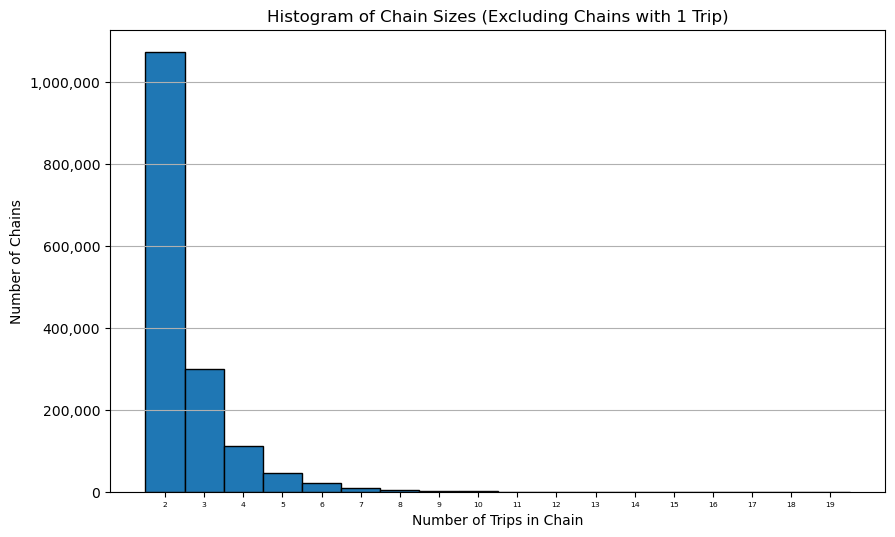

In [69]:
# First we filter out chains with only 1 trip
filtered_chain_trip_counts = chain_trip_counts[chain_trip_counts > 1]

plt.figure(figsize=(10, 6))

# Adjust the bins to match the filtered data
bins = range(2, filtered_chain_trip_counts.max() + 2)  # Start from 2 since 1-trip chains are excluded
plt.hist(filtered_chain_trip_counts, bins=bins, align='left', edgecolor='black')
plt.title('Histogram of Chain Sizes (Excluding Chains with 1 Trip)')
plt.xlabel('Number of Trips in Chain')
plt.ylabel('Number of Chains')
plt.xticks(range(2, filtered_chain_trip_counts.max() + 1))
plt.grid(axis='y')
plt.tick_params(axis='x', which='major', labelsize=5.5)

# Format the y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()
